In [3]:
import numpy as np
import os
import struct

# Load the MNIST dataset
def load_data(path):
    
    train_images_path = path+'train-images.idx3-ubyte'
    train_labels_path = path+'train-labels.idx1-ubyte'

    test_images_path = path+'t10k-images.idx3-ubyte'
    test_labels_path = path+'t10k-labels.idx1-ubyte'
    
    with open(train_images_path, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        X_train = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows*cols)
    with open(train_labels_path, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        y_train = np.fromfile(f, dtype=np.uint8)
    with open(test_images_path, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        X_test = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows*cols)
    with open(test_labels_path, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        y_test = np.fromfile(f, dtype=np.uint8)
    return X_train, y_train, X_test, y_test

# Preprocess the dataset
def preprocess_data(X_train, y_train, X_test, y_test):
    # Normalize pixel values to be between 0 and 1
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255
    
    # Convert labels to one-hot encoding
    num_classes = 10
    y_train = np.eye(num_classes)[y_train]
    y_test = np.eye(num_classes)[y_test]
    
    return X_train, y_train, X_test, y_test

# Define the neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((1, output_size))
        
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2
        
    def backward(self, X, y, output):
        self.dz2 = output - y
        self.dW2 = np.dot(self.a1.T, self.dz2) + (l2_lambda * self.W2)
        self.db2 = np.sum(self.dz2, axis=0, keepdims=True)
        self.dz1 = np.dot(self.dz2, self.W2.T) * sigmoid_gradient(self.z1)
        self.dW1 = np.dot(X.T, self.dz1) + (l2_lambda * self.W1)
        self.db1 = np.sum(self.dz1, axis=0)
        
    def update(self, learning_rate):
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2

# Define the sigmoid and softmax activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    exp_scores = np.exp(x)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Set hyperparameters
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.1
l2_lambda = 0.001
num_epochs = 100
batch_size = 128
lr_decay = 0.1
decay_interval = 10

# Load and preprocess the dataset

file_path = 'MINIST/'

X_train, y_train, X_test, y_test = load_data(file_path)
X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)

# Initialize the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)

train_list=[]
test_list=[]
# Train the neural network
for epoch in range(num_epochs):
    # Decay learning rate
    if epoch % decay_interval == 0 and epoch > 0:
        learning_rate *= lr_decay
        
    # Shuffle the data
    shuffle_indices = np.random.permutation(X_train.shape[0])
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]
    
    # Mini-batch training
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        # Forward pass
        output = nn.forward(X_batch)
        
        # Backward pass
        nn.backward(X_batch, y_batch, output)
        
        # Update parameters
        nn.update(learning_rate)
        
    # Print accuracy on training and test set

    
    if epoch % 10 == 0:
        train_acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(nn.forward(X_train), axis=1))
        test_acc = np.mean(np.argmax(y_test, axis=1) == np.argmax(nn.forward(X_test), axis=1))
        train_list.append(train_acc)
        test_list.append(test_acc)
        print(f"Epoch {epoch}: Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")


Epoch 0: Train Accuracy: 0.8679166666666667, Test Accuracy: 0.8638
Epoch 10: Train Accuracy: 0.9496, Test Accuracy: 0.9404
Epoch 20: Train Accuracy: 0.9598, Test Accuracy: 0.945
Epoch 30: Train Accuracy: 0.9609166666666666, Test Accuracy: 0.9451
Epoch 40: Train Accuracy: 0.96085, Test Accuracy: 0.9452
Epoch 50: Train Accuracy: 0.9608333333333333, Test Accuracy: 0.9452
Epoch 60: Train Accuracy: 0.9608333333333333, Test Accuracy: 0.9452
Epoch 70: Train Accuracy: 0.9608333333333333, Test Accuracy: 0.9452
Epoch 80: Train Accuracy: 0.9608333333333333, Test Accuracy: 0.9452
Epoch 90: Train Accuracy: 0.9608333333333333, Test Accuracy: 0.9452


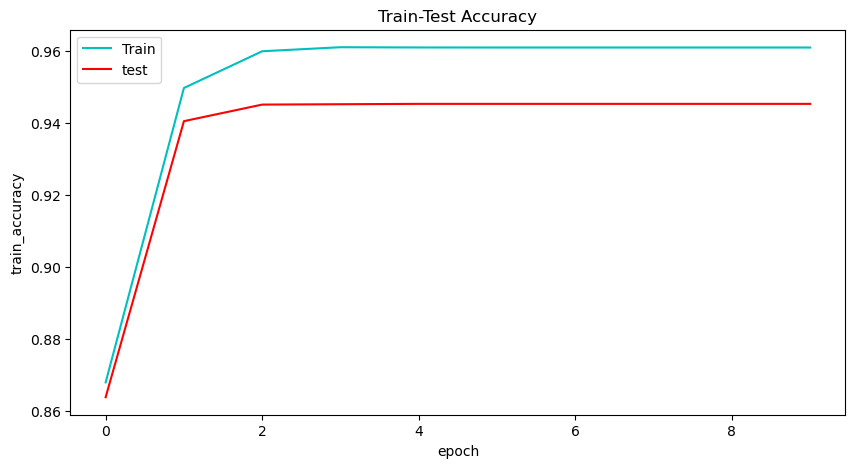

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.xlabel(u'epoch',fontsize=10)
plt.ylabel(u'train_accuracy',fontsize=10)
plt.title(u'Train-Test Accuracy',fontsize=12)
plt.plot(train_list,c = "c",label='Train')
plt.plot(test_list,c = "r",label='test')
plt.legend()